# Playing with the visits table 

### Alex Lu | Full Year 2018  
---

December 17, 2018

**OBJECTIVE**

---

I have been tasked with getting distributions of age, sex, for Arbor and PFC patients over the last year. This notebook examines the age and sex distributions from a visits paradigm (and not a unique'd patients paradigm). 

First, let's import all of the stuff that we'll need

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.indicator import *
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

We want to filter on the time of visit for longitudinal visualization. First, we should do a conversion on the format of the time string to make it more workable. Then, we're going to make this new 'ts' column the index, and drop the string form VisitDate series. 

In [5]:
def time_filter(t1, t2, df):
    # accepts numerical tuples of form (year, mon, day)
    bound1 = datetime(*t1)
    bound2 = datetime(*t2)
    print datetime(*t1), datetime(*t2)
    return df[bound1:bound2]

In [6]:
path_visits = "visits_data/both_clinics_2018_full_year.csv"
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits.groupby(df_visits['PatientNumber']).size().describe()

count    858.000000
mean       2.604895
std        1.919944
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       20.000000
dtype: float64

In [7]:
df_visits['PatientNumber'].describe()

count         2235
unique         858
top       N0067052
freq            20
Name: PatientNumber, dtype: object

In [8]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
arbor_general_visits = df_visits[df_visits['VisitType'] == 'ARBOR GENERAL VISIT']
pfc_general_visits = df_visits[df_visits['VisitType'] == 'PFC NEW PATIENT VISIT']

print arbor_general_visits.describe()
print pfc_general_visits.describe()

        Age(Year)
count  499.000000
mean    48.721443
std     17.161662
min     18.000000
25%     33.000000
50%     50.000000
75%     64.000000
max     83.000000
        Age(Year)
count  343.000000
mean    49.976676
std     17.631860
min      4.000000
25%     34.000000
50%     54.000000
75%     63.000000
max     89.000000


In [9]:
arbor_general_visits.head(5)

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-01-21 09:15:00,AFC,N0064750,66,ARBOR GENERAL VISIT,F,2018-01-21 09:15:00,2018-01-21 09:00:45
2018-01-21 09:30:00,AFC,N0058384,52,ARBOR GENERAL VISIT,M,2018-01-21 09:30:00,2016-11-06 09:14:12
2018-01-21 10:00:00,AFC,N0064743,19,ARBOR GENERAL VISIT,F,2018-01-21 10:00:00,2018-01-21 08:59:30
2018-01-21 10:30:00,AFC,N0014256,67,ARBOR GENERAL VISIT,F,2018-01-21 10:30:00,2012-05-27 09:42:32
2018-01-21 10:45:00,AFC,N0064775,64,ARBOR GENERAL VISIT,F,2018-01-21 10:45:00,2018-01-21 09:25:35


Let's take a look and make sure we're looking at the right stuff

In [10]:
def temporal_distribution(df, ts_name = 'ts'):
    '''

    '''
    time_gb = df.groupby(df[ts_name].dt.month)
    plt.figure()
    time_gb.plot()
    plt.show()


In [11]:
arbor_general_visits['Sex'].value_counts(normalize=True)

F    0.460922
M    0.408818
U    0.130261
Name: Sex, dtype: float64

In [12]:
pfc_general_visits['Sex'].value_counts(normalize=True)

F    0.548105
M    0.393586
U    0.058309
Name: Sex, dtype: float64

In [13]:
arbor_general_visits['Age(Year)'].value_counts(bins=10)

(63.5, 70.0]                  78
(57.0, 63.5]                  65
(24.5, 31.0]                  61
(50.5, 57.0]                  54
(37.5, 44.0]                  53
(17.933999999999997, 24.5]    52
(44.0, 50.5]                  47
(31.0, 37.5]                  41
(70.0, 76.5]                  38
(76.5, 83.0]                  10
Name: Age(Year), dtype: int64

In [14]:
pfc_general_visits['Age(Year)'].value_counts(bins=10)

(55.0, 63.5]     69
(46.5, 55.0]     58
(21.0, 29.5]     58
(63.5, 72.0]     52
(29.5, 38.0]     39
(38.0, 46.5]     25
(72.0, 80.5]     23
(12.5, 21.0]      9
(80.5, 89.0]      8
(3.914, 12.5]     2
Name: Age(Year), dtype: int64

In [15]:
pfc_general_visits[pfc_general_visits['Age(Year)'] < 18]

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-05-23 09:30:00,PFC,N0039583,4,PFC NEW PATIENT VISIT,U,2018-05-23 09:30:00,2014-06-29 11:51:57
2018-07-05 10:00:00,PFC,N0041335,4,PFC NEW PATIENT VISIT,F,2018-07-05 10:00:00,2014-08-24 19:51:32


In [16]:
arbor_visits_clean = arbor_general_visits[arbor_general_visits['Age(Year)'] > 18]
pfc_visits_clean = pfc_general_visits[pfc_general_visits['Age(Year)'] > 18]

In [17]:
arbor_visits_clean['Sex'].value_counts()

F    229
M    203
U     65
Name: Sex, dtype: int64

In [18]:
pfc_visits_clean['Sex'].value_counts()

F    187
M    134
U     19
Name: Sex, dtype: int64

In [19]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.935, 25.4]    61
(25.4, 31.8]      50
(31.8, 38.2]      48
(38.2, 44.6]      46
(44.6, 51.0]      57
(51.0, 57.4]      44
(57.4, 63.8]      65
(63.8, 70.2]      78
(70.2, 76.6]      38
(76.6, 83.0]      10
Name: Age(Year), dtype: int64

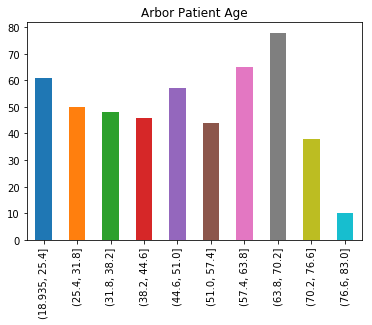

In [20]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='Arbor Patient Age')

In [21]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.929, 26.0]    46
(26.0, 33.0]      35
(33.0, 40.0]      29
(40.0, 47.0]      27
(47.0, 54.0]      42
(54.0, 61.0]      52
(61.0, 68.0]      65
(68.0, 75.0]      25
(75.0, 82.0]      12
(82.0, 89.0]       7
Name: Age(Year), dtype: int64

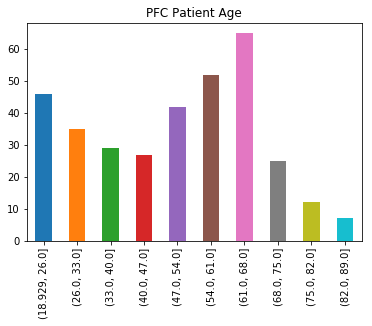

In [22]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='PFC Patient Age')

In [23]:
arbor_visits_clean['Age(Year)'].describe()

count    497.000000
mean      48.845070
std       17.084767
min       19.000000
25%       33.000000
50%       50.000000
75%       64.000000
max       83.000000
Name: Age(Year), dtype: float64

In [24]:
pfc_visits_clean['Age(Year)'].describe()

count    340.000000
mean      50.341176
std       17.263054
min       19.000000
25%       34.750000
50%       54.000000
75%       63.000000
max       89.000000
Name: Age(Year), dtype: float64

In [25]:
arbor_visits_clean['PatientNumber'].describe()

count          497
unique         422
top       N0059372
freq             5
Name: PatientNumber, dtype: object

In [26]:
pfc_visits_clean['PatientNumber'].describe()

count          340
unique         332
top       N0071136
freq             2
Name: PatientNumber, dtype: object

In [27]:
arbor_visits_clean.groupby(arbor_visits_clean['PatientNumber']).size().describe()

count    422.000000
mean       1.177725
std        0.500998
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
dtype: float64

In [28]:
pfc_visits_clean.groupby(pfc_visits_clean['PatientNumber']).size().describe()

count    332.000000
mean       1.024096
std        0.153580
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64

In [29]:
def get_grouped_data(df, column, group_keys=None, summed=True):
    grouped = df.groupby(df[column])
    visits_per_group = [] if group_keys is None else np.zeros(len(group_keys))
    if group_keys is not None:
        for c, group in enumerate(group_keys):
            if group in grouped.groups:
                visits_per_group[c] = len(grouped.groups[group])
    else:
        for group in grouped.groups:
            visits_per_group.append(len(grouped.groups[group]))
        
    if summed:
        return np.sum(visits_per_group)
    else:
        return visits_per_group

In [30]:
def visits_periodic(df, period='mom', group_keys=None):
    
    periodic_visits = []
    time_points = []
    spec_usage_mom = []
    
    if period == 'mom':
        months = [val for val in range(7, 13)]
        years = [2018]
        for year in years:
            for begin_month in months:
                tp1 = (year, begin_month, 1)
                tp2 = ()
                if begin_month == 12:
                    tp2 = (year+1, 1, 1)
                else:
                    tp2 = (year, begin_month+1, 1)
                    
                print tp1, tp2
                filtered = time_filter(tp1,tp2, df)
                
                if filtered.values.shape[0] == 0:
                    continue
                else:
                    periodic_visits.append(get_grouped_data(filtered, 'PatientNumber'))
                    spec_usage_mom.append(get_grouped_data(filtered, 'VisitType', group_keys = group_keys, summed=False))
                    time_points.append(str(begin_month) + '/' + str(year))
                    

    return (periodic_visits, np.array(spec_usage_mom), time_points)

In [31]:
print arbor_visits_clean.index


DatetimeIndex(['2018-01-21 09:15:00', '2018-01-21 09:30:00',
               '2018-01-21 10:00:00', '2018-01-21 10:30:00',
               '2018-01-21 10:45:00', '2018-01-21 11:00:00',
               '2018-01-21 11:30:00', '2018-01-21 11:45:00',
               '2018-01-21 12:00:00', '2018-01-21 12:30:00',
               ...
               '2018-07-08 10:30:00', '2018-07-08 10:45:00',
               '2018-07-08 11:00:00', '2018-07-08 11:15:00',
               '2018-07-08 11:45:00', '2018-07-08 12:00:00',
               '2018-07-08 13:00:00', '2018-07-22 08:45:00',
               '2018-09-09 10:00:00', '2018-09-09 12:45:00'],
              dtype='datetime64[ns]', name=u'VisitDateTimeTS', length=497, freq=None)


In [32]:
arbor_spec_clinics = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'LAB FOLLOW-UP NOTE'
    ]


periodic_visits, spec_usage_mom, time_points = visits_periodic(arbor_visits_clean, 
                                                               group_keys=arbor_spec_clinics)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

arbor_specialty_clinics_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(arbor_spec_clinics, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

arbor_specialty_clinics_df.head(12)


(2018, 7, 1) (2018, 8, 1)
2018-07-01 00:00:00 2018-08-01 00:00:00


KeyError: 1530403200000000000

In [45]:
arbor_visits_clean.tail(20)


,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-07-01 09:45:00,PFC,N0008011,29,ARBOR GENERAL VISIT,F,2018-07-01 09:45:00,2011-11-13 09:37:01
2018-07-01 10:00:00,PFC,N0065934,22,ARBOR GENERAL VISIT,U,2018-07-01 10:00:00,2018-03-25 09:22:34
2018-07-01 10:15:00,PFC,N0068019,36,ARBOR GENERAL VISIT,M,2018-07-01 10:15:00,2018-07-01 09:32:55
2018-07-01 10:30:00,PFC,N0067796,27,ARBOR GENERAL VISIT,F,2018-07-01 10:30:00,2018-06-17 10:11:07
2018-07-01 10:45:00,PFC,N0068026,67,ARBOR GENERAL VISIT,M,2018-07-01 10:45:00,2018-07-01 10:22:50
2018-07-01 11:00:00,PFC,N0068040,21,ARBOR GENERAL VISIT,M,2018-07-01 11:00:00,2018-07-01 10:54:24
2018-07-08 09:30:00,PFC,N0068115,35,ARBOR GENERAL VISIT,M,2018-07-08 09:30:00,2018-07-08 08:41:13
2018-07-08 09:45:00,PFC,N0068161,32,ARBOR GENERAL VISIT,F,2018-07-08 09:45:00,2018-07-08 08:57:21
2018-07-08 10:00:00,PFC,N0049150,70,ARBOR GENERAL VISIT,F,2018-07-08 10:00:00,2015-07-12 09:20:45


(0, 18)

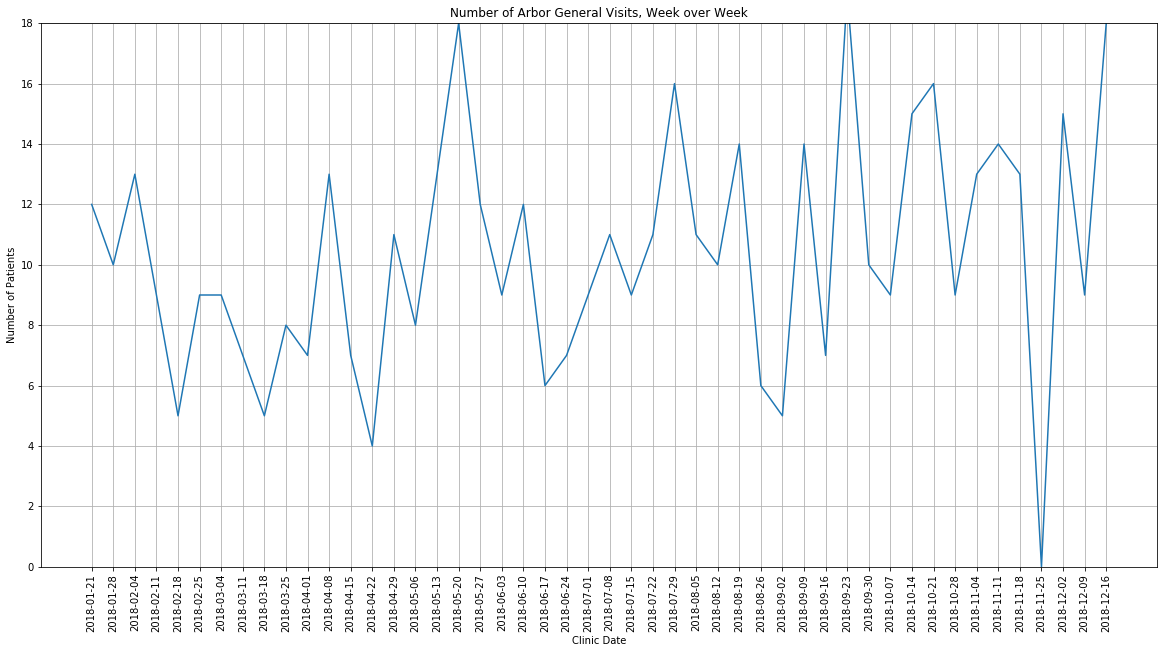

In [33]:
arbor_date_grouped = arbor_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), arbor_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of Arbor General Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 18])

(0, 30)

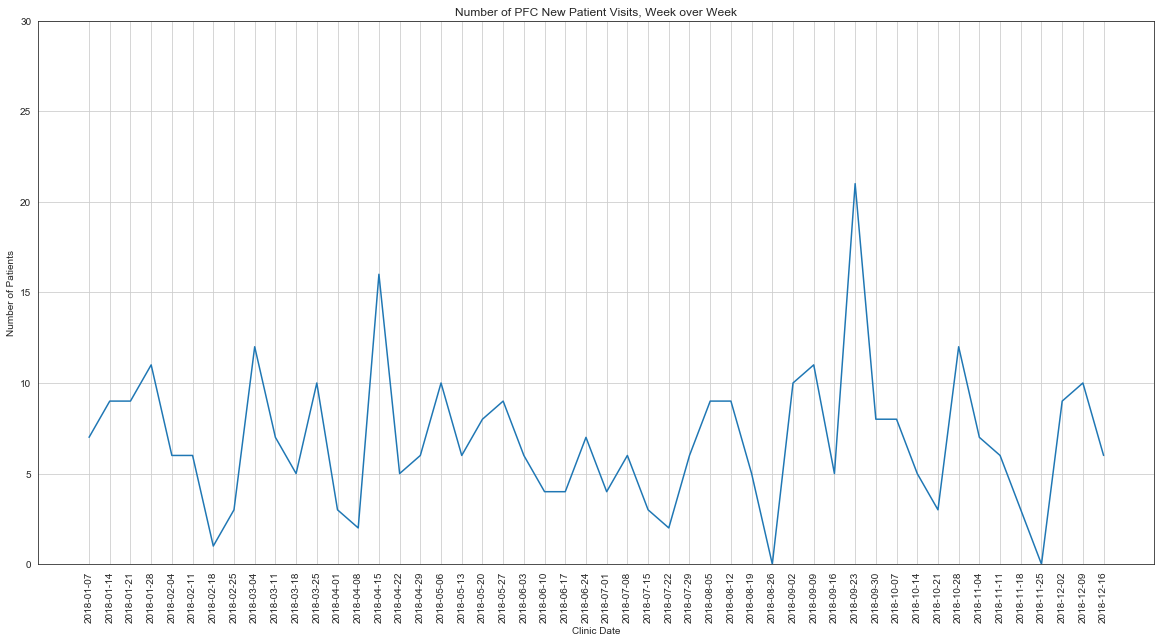

In [46]:
pfc_date_grouped = pfc_visits_clean.groupby(pd.Grouper(key='VisitDateTimeTS', freq='W-SUN'))
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(pfc_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'), pfc_date_grouped['PatientNumber'].count().values)
plt.xticks(rotation=90)
ax.grid(True)
plt.title('Number of PFC New Patient Visits, Week over Week')
plt.xlabel('Clinic Date')
plt.ylabel('Number of Patients')
plt.ylim([0, 30])

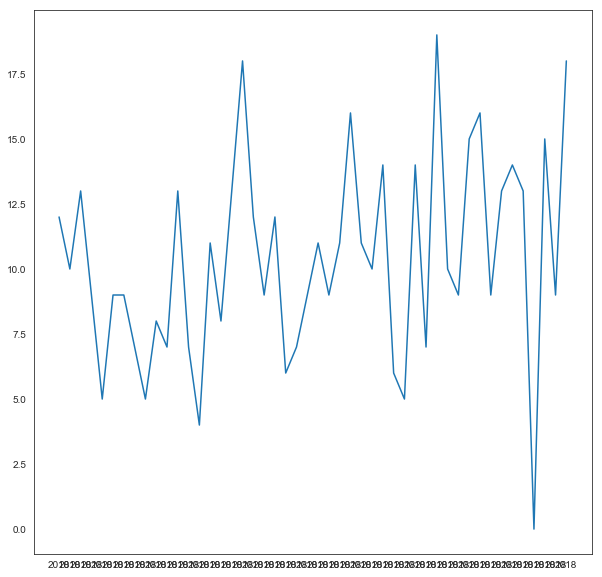

In [35]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=arbor_date_grouped['PatientNumber'].count(), ax=ax)
ax.set_xticks(arbor_date_grouped['PatientNumber'].count().index.strftime('%Y-%m-%d'))

In [36]:
arbor_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=10)

(2018-01-21 01:20:55.499999999, 2018-02-23 07:22:30]    49
(2018-02-23 07:22:30, 2018-03-28 05:30:00]              38
(2018-03-28 05:30:00, 2018-04-30 03:37:30]              42
(2018-04-30 03:37:30, 2018-06-02 01:45:00]              51
(2018-06-02 01:45:00, 2018-07-04 23:52:30]              43
(2018-07-04 23:52:30, 2018-08-06 22:00:00]              58
(2018-08-06 22:00:00, 2018-09-08 20:07:30]              35
(2018-09-08 20:07:30, 2018-10-11 18:15:00]              59
(2018-10-11 18:15:00, 2018-11-13 16:22:30]              67
(2018-11-13 16:22:30, 2018-12-16 14:30:00]              55
Name: VisitDateTimeTS, dtype: int64

In [37]:
pfc_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=10)

(2018-01-06 00:35:58.799999999, 2018-02-09 16:12:00]    42
(2018-02-09 16:12:00, 2018-03-15 23:34:00]              29
(2018-03-15 23:34:00, 2018-04-19 06:56:00]              36
(2018-04-19 06:56:00, 2018-05-23 14:18:00]              35
(2018-05-23 14:18:00, 2018-06-26 21:40:00]              30
(2018-06-26 21:40:00, 2018-07-31 05:02:00]              21
(2018-07-31 05:02:00, 2018-09-03 12:24:00]              33
(2018-09-03 12:24:00, 2018-10-07 19:46:00]              53
(2018-10-07 19:46:00, 2018-11-11 03:08:00]              33
(2018-11-11 03:08:00, 2018-12-15 10:30:00]              28
Name: VisitDateTimeTS, dtype: int64

In [38]:
grouped = pfc_visits_clean.groupby('VisitType')
for g in grouped.groups:
    print g
    print len(grouped.groups[g])

PFC NEW PATIENT VISIT
340


In [39]:
arbor_visits_clean.groupby('VisitType').size()

VisitType
ARBOR GENERAL VISIT    497
dtype: int64

In [40]:
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
df_visits_clean = df_visits[df_visits['Age(Year)']> 18]
df_visits_clean.sort_values('VisitDateTimeTS', inplace=True)

/Users/alex/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [41]:
df_visits_clean.groupby('VisitType').size()

VisitType
ADMIN CHART REVIEW NOTE             14
ARBOR CARDIOLOGY                     7
ARBOR DERMATOLOGY                   18
ARBOR FAST TRACK TB                  2
ARBOR FAST TRACK VACCINE             2
ARBOR FOLLOW-UP VISIT               21
ARBOR GENERAL VISIT                497
ARBOR MENTAL HEALTH                 22
ARBOR MSK                           16
ARBOR NEUROLOGY                      5
ARBOR OPHTHALMOLOGY                 20
ARBOR WOMEN'S HEALTH                 9
BRIDGE TO CARE NOTE                  6
HEALTH EDUCATOR NOTE               143
LAB FOLLOW-UP NOTE                 263
MISC NOTE                          233
PATIENT NAVIGATOR NOTE              90
PFC DERMATOLOGY VISIT               25
PFC FAST TRACK                      24
PFC FAST TRACK VACCINE              13
PFC FOLLOW UP VISIT                325
PFC HEP CLINIC VISIT                23
PFC HEPATITIS VACCINE SCREENING      1
PFC MENTAL HEALTH VISIT             10
PFC NEW PATIENT VISIT              340
PFC OPHTHALMOLO

In [42]:
ALL_SPEC_KEYS = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'PFC DERMATOLOGY VISIT',
    'PFC FOLLOW UP VISIT',
    'PFC HEP CLINIC VISIT',
    'PFC MENTAL HEALTH VISIT',
    'PFC NEW PATIENT VISIT',
    'PFC OPHTHALMOLOGY VISIT',
    "PFC WOMEN'S CLINIC VISIT",
    'PFC FAST TRACK VACCINE'
]


periodic_visits, spec_usage_mom, time_points = visits_periodic(df_visits_clean, 
                                                               group_keys=ALL_SPEC_KEYS)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

joint_spec_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(ALL_SPEC_KEYS, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

joint_spec_df.head(20)


(2018, 7, 1) (2018, 8, 1)
2018-07-01 00:00:00 2018-08-01 00:00:00
(2018, 8, 1) (2018, 9, 1)
2018-08-01 00:00:00 2018-09-01 00:00:00
(2018, 9, 1) (2018, 10, 1)
2018-09-01 00:00:00 2018-10-01 00:00:00
(2018, 10, 1) (2018, 11, 1)
2018-10-01 00:00:00 2018-11-01 00:00:00
(2018, 11, 1) (2018, 12, 1)
2018-11-01 00:00:00 2018-12-01 00:00:00
(2018, 12, 1) (2019, 1, 1)
2018-12-01 00:00:00 2019-01-01 00:00:00
1151
[[ 0.  5.  0. 56.  0.  3.  1.  0.  1.  0. 36.  0.  0. 17.  9.  6.  4.]
 [ 0.  0.  0. 41.  3.  0.  0.  5.  0.  3. 26.  0.  0. 23.  2.  1.  0.]
 [ 0.  7.  3. 55.  4.  4.  1.  0.  0.  0. 21.  0.  2. 55.  0.  6.  0.]
 [ 0.  0.  0. 49.  1.  0.  0.  5.  0.  5. 27.  6.  0. 28.  5.  6.  4.]
 [ 0.  3.  3. 40.  0.  0.  1.  0.  3.  0. 23.  5.  2. 16.  4.  2.  1.]
 [ 0.  0.  5. 42.  4.  3.  0.  5.  0.  2. 23.  0.  0. 25.  0.  3.  0.]]
['7/2018', '8/2018', '9/2018', '10/2018', '11/2018', '12/2018']


,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,PFC DERMATOLOGY VISIT,PFC FAST TRACK VACCINE,PFC FOLLOW UP VISIT,PFC HEP CLINIC VISIT,PFC MENTAL HEALTH VISIT,PFC NEW PATIENT VISIT,PFC OPHTHALMOLOGY VISIT,PFC WOMEN'S CLINIC VISIT
7/2018,0.0,5.0,0.0,56.0,0.0,3.0,1.0,0.0,1.0,0.0,4.0,36.0,0.0,0.0,17.0,9.0,6.0
8/2018,0.0,0.0,0.0,41.0,3.0,0.0,0.0,5.0,0.0,3.0,0.0,26.0,0.0,0.0,23.0,2.0,1.0
9/2018,0.0,7.0,3.0,55.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,21.0,0.0,2.0,55.0,0.0,6.0
10/2018,0.0,0.0,0.0,49.0,1.0,0.0,0.0,5.0,0.0,5.0,4.0,27.0,6.0,0.0,28.0,5.0,6.0
11/2018,0.0,3.0,3.0,40.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,23.0,5.0,2.0,16.0,4.0,2.0
12/2018,0.0,0.0,5.0,42.0,4.0,3.0,0.0,5.0,0.0,2.0,0.0,23.0,0.0,0.0,25.0,0.0,3.0


In [43]:
joint_spec_df.to_csv('joint_spec_clinics_12_17.csv')